# **Logistic Regression Assignment - Lead Scoring**

## 1. **Data Understanding, Preparation & EDA**

### 1.1 **Data Understanding**

In [396]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

# Viz tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)

sns.set(style="darkgrid",font_scale=1.1)

*Note: Please replace your path to input file before running next cell.*

In [397]:
# Loading data into dataframe

lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [398]:
# Data Shape

lead_df.shape

(9240, 37)

In [399]:
# features info check

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [400]:
# duplicated rows check

lead_df.duplicated().any()

False

In [401]:
# Prospect ID duplicate check

lead_df['Prospect ID'].duplicated().any()

False

In [402]:
# Lead Number duplicate check

lead_df['Lead Number'].duplicated().any()

False

**Observations**
<br> *- From above we can see that, maximum columns are of object type and very few are continuous variables.
<br> - Target Column is - **`Converted`** 
<br> - `Prospect ID` and `Lead Number` are looks like a primary keys and are unique. We can remove these columns later in data cleaning part as they are not helping in analysis.
<br> - We do not have any duplicate rows and also do not have any duplicates in `Prospect ID` and `Lead Number`*


### 1.2 **Data Preparation**

***Many of the categorical variables have a level called `Select` which needs to be handled because it is as good as a null value (think why?).***
<br> *The answer is - Some users did not selected any option from the given list or dropdown hence, Select option populated in columns. In other words, There must be some list or dropdown on page from which user supposed to select one option from it, so user did not selected any option that means user did not made any choice hence we can treat `Select` as a null value.*

In [403]:
# As we can observe that there are select values for many column.
# This is because user did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting `Select` to null values
lead_df.replace('Select', np.nan, inplace=True)

In [404]:
# Null values check

lead_df.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Lead Number                 

In [405]:
# Converting null values to percentage

null_cols = round((lead_df.isnull().sum()/len(lead_df.index))*100,2).sort_values(ascending=False)
null_cols

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

***As we see, there are huge number of null values in many columns so will do null values treatment one by one***
<br> *- Firstly, We will remove those columns which are having null values higher than `70%`.
<br> - Secondly, we will replace the null values with some other value w.r.t buisness point of view*

In [406]:
# Selecting columns which are having null values higher than 70%

cols_above_70_null = list(null_cols[null_cols.values > 70].index)
cols_above_70_null

['How did you hear about X Education', 'Lead Profile']

In [407]:
# dropping columns which are having null values higher than 70%

lead_df = lead_df.drop(cols_above_70_null,axis=1)
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### 1.3 **EDA or Data Visualization**

 #### 1.3.1 Categorical Variables and Univariate Analysis

***Now we will take care of null columns one by one***

##### **Column: Lead Origin**

In [408]:
# 1. Lead Origin

lead_df['Lead Origin'].describe()

count                        9240
unique                          5
top       Landing Page Submission
freq                         4886
Name: Lead Origin, dtype: object

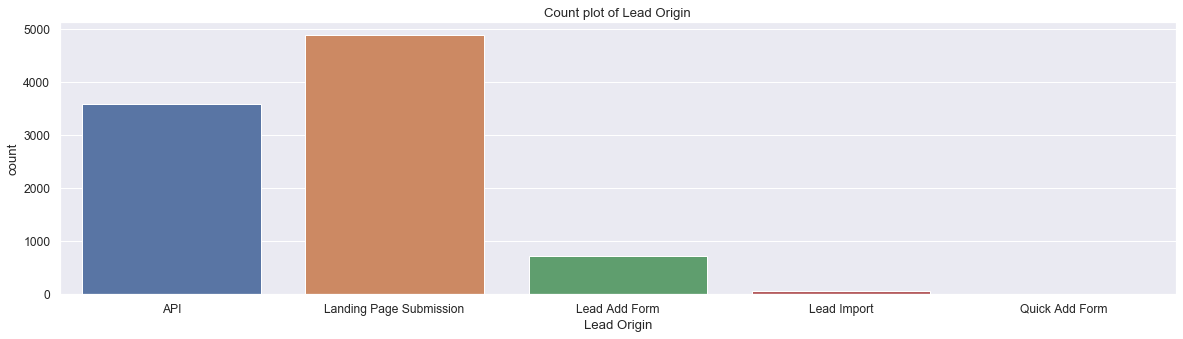

In [409]:
# plotting countplot for Lead Origin

plt.figure(figsize = (20,5))
sns.countplot(lead_df['Lead Origin'])
plt.title('Count plot of Lead Origin')
plt.show()

In [410]:
lead_df['Lead Origin'] = lead_df['Lead Origin'].replace(['Lead Import','Quick Add Form'])

In [411]:
# Lead Source

#replacing Nan Values and combining low frequency values
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan,'Others')

# Fixing the name 
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')

# Putting Social Media to Socia Meadia category
lead_df['Lead Source'] = lead_df['Lead Source'].replace('Facebook','Social Media')

# 
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat','Social Media','Welingak Website','Referral Sites'] ,'Others') 

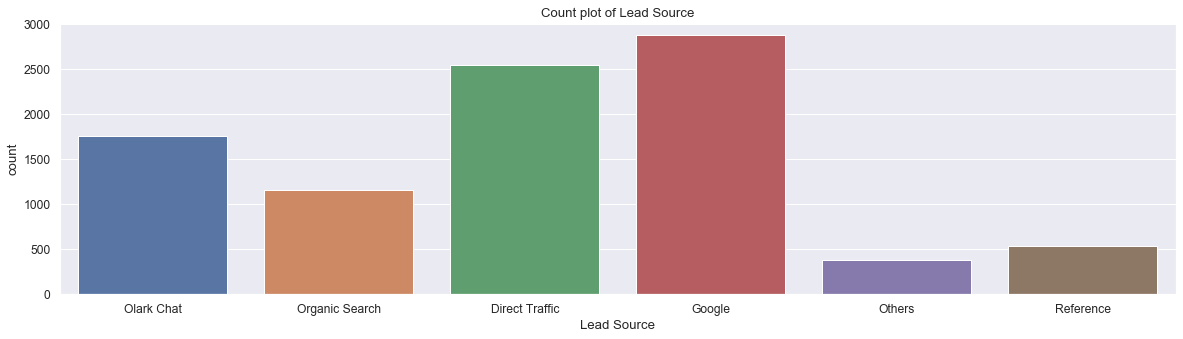

In [412]:
# plotting countplot for Lead Source

plt.figure(figsize = (20,5))
sns.countplot(lead_df['Lead Source'])
plt.title('Count plot of Lead Source')
plt.show()

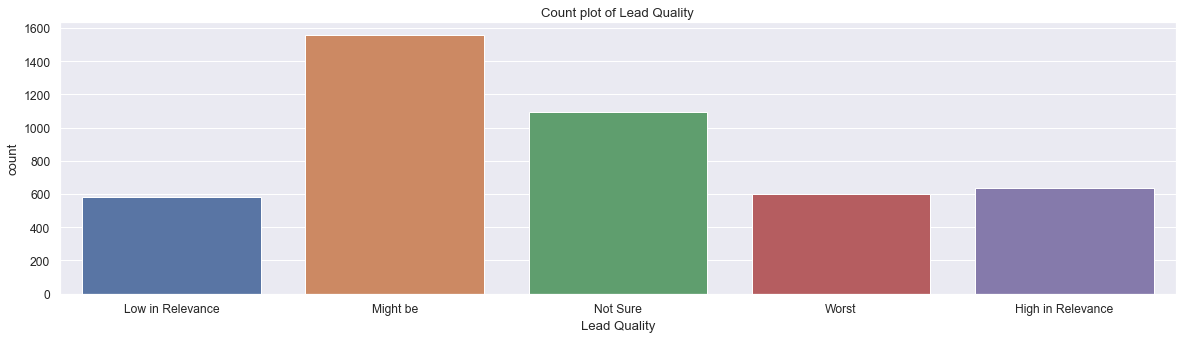

In [413]:
# plotting countplot for Lead Quality

plt.figure(figsize = (20,5))
sns.countplot(lead_df['Lead Quality'])
plt.title('Count plot of Lead Quality')
plt.show()

*Here, we will consider missing `Lead Quality` values as `Not Sure`.*

In [414]:
# Filling NA to Not Sure

lead_df['Lead Quality'].fillna('Not Sure',inplace=True)

In [415]:
# Dropping 
# Asymmetrique Profile Score, 
# Asymmetrique Activity Score,
# Asymmetrique Profile Index,
# Asymmetrique Activity Index

lead_df = lead_df.drop(['Asymmetrique Profile Score',
                    'Asymmetrique Activity Score',
                    'Asymmetrique Profile Index',
                    'Asymmetrique Activity Index'], axis=1)

##### **Column: City**

In [416]:
lead_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [417]:
lead_df['City'] = lead_df['City'].replace(['Thane & Outskirts', 
                                           'Other Metro Cities', 
                                           'Other Cities', 
                                           'Other Cities of Maharashtra', 
                                           'Tier II Cities'], 'Others')

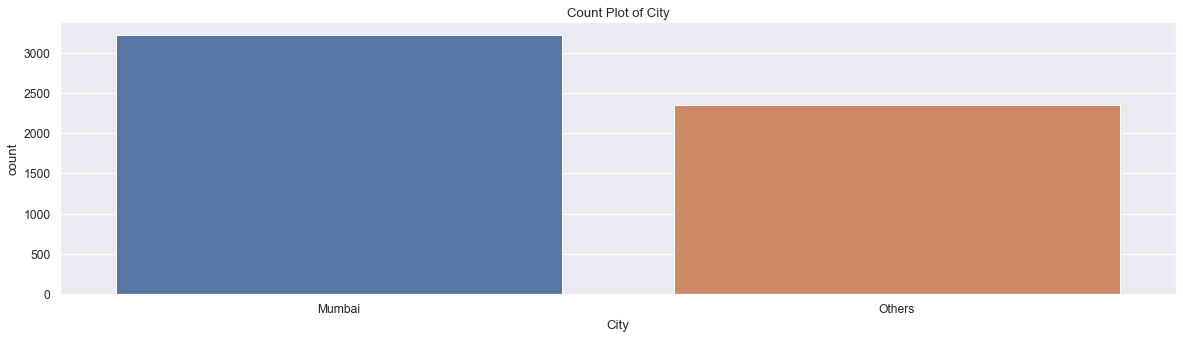

In [418]:
# Plotting count plot for city

plt.figure(figsize = (20,5))
sns.countplot(lead_df['City'])
plt.title('Count Plot of City')
plt.show()

*Here we will put missing City values in `Other Cities` category. So replacing null values with `Other Cities` in City column.*

In [419]:
# Filling NA cities to Other cities.

lead_df['City'].fillna('Other Cities',inplace=True)

##### **Column: Specialization**

Text(0.5, 1.0, 'Count Plot of Specialization')

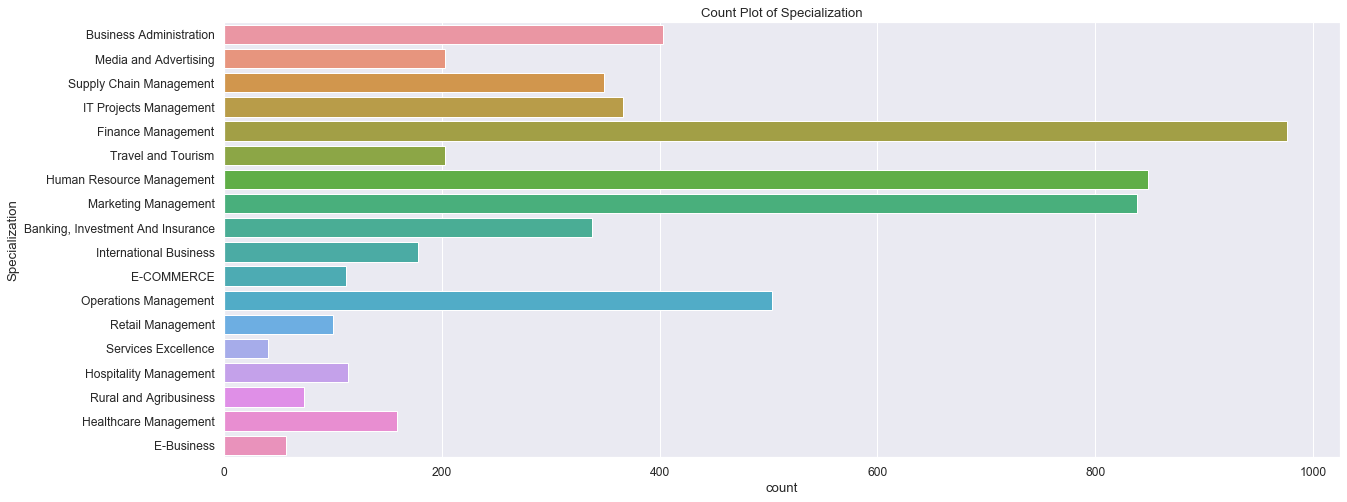

In [420]:
# ploting countplot for Specialization

plt.figure(figsize = (20,8))
sns.countplot(y=lead_df['Specialization'])
plt.title('Count Plot of Specialization')

*Here we are creating a new level for null `Specialization` values i.e. `Others` and let buisness decide what they want to do with this kind of missing Specialization.*

We see that specialization with **Management** in them have higher number of leads.
So this is definitely a significant variable and should not be dropped.

In [421]:
# Making category Others for Specialization

lead_df['Specialization'].fillna('Others',inplace=True)

##### **Column: Tags**

In [422]:
lead_df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [423]:
lead_df['Tags'] = lead_df['Tags'].replace(['Still Thinking','Want to take admission but has financial problems','Interested in Next batch',
                                          'In confusion whether part time or DLP','Lateral student','Shall take in the next coming month',
                                         'University not recognized','Recognition issue (DEC approval)'],'Others')

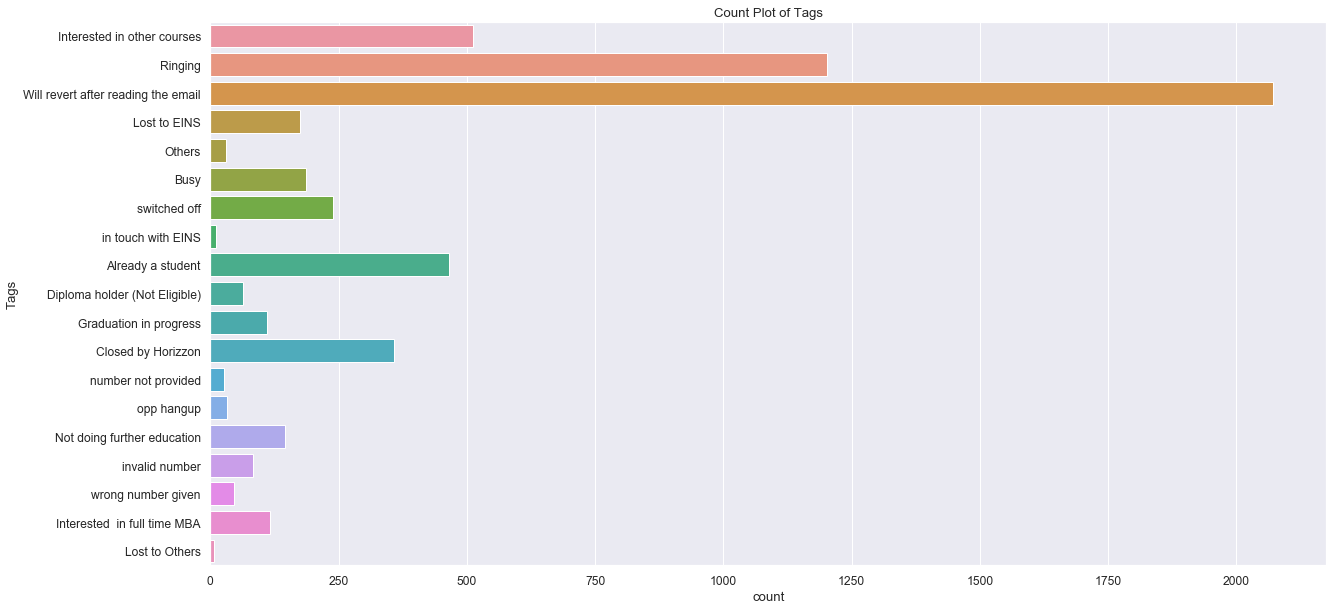

In [424]:
# Plotting countplot for Tags

plt.figure(figsize = (20,10))
sns.countplot(y=lead_df['Tags'])
plt.title('Count Plot of Tags')
plt.show()

*Here we are creating a new level for missing tags i.e `No Tags` and let buisness handle these no tags values.*

In [425]:
# Filling NA tags to No tags

lead_df['Tags'].fillna('No Tags',inplace=True)

#### **Column: What matters most to you in choosing a course**

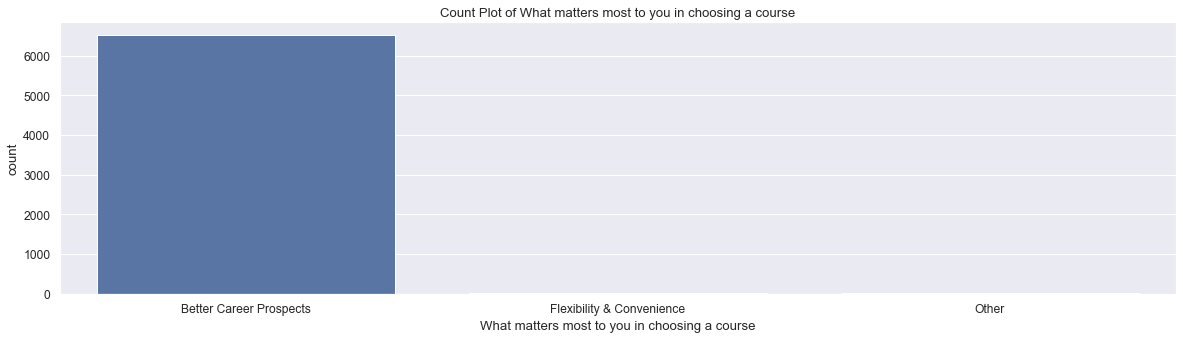

In [426]:
# Count plot for What matters most to you in choosing a course

plt.figure(figsize = (20,5))
sns.countplot(lead_df['What matters most to you in choosing a course'])
plt.title('Count Plot of What matters most to you in choosing a course')
plt.show()

*Here as we see `Better Career Prospects` has higher count so replacing null values with the same.*

In [427]:
# Filling NA to Others

lead_df['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)

##### **Column: What is your current occupation**

In [428]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(['Businessman','Housewife'], 'Other')

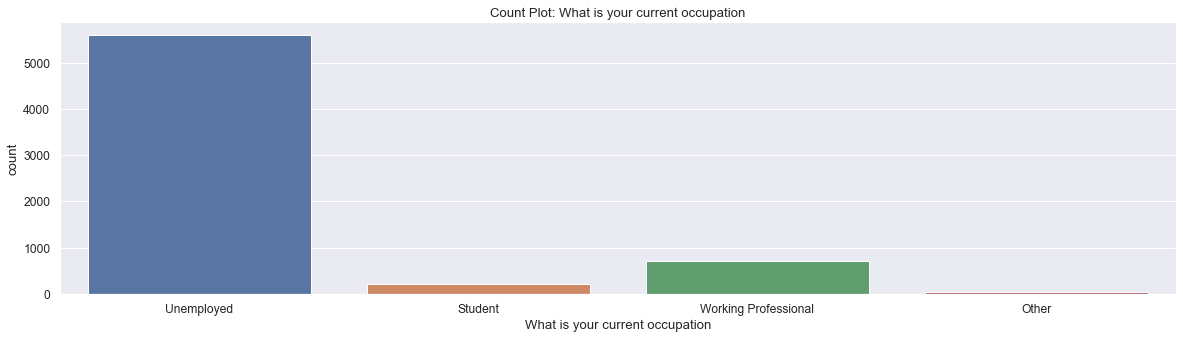

In [429]:
# Plotting countplot for What is your current occupation

plt.figure(figsize = (20,5))
sns.countplot(lead_df['What is your current occupation'])
plt.title('Count Plot: What is your current occupation')
plt.show()

*Here as we see `Unemployed` has major count values so replacing with the same*

- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in terms of Absolute numbers.

In [430]:
# filling NA to Unemployed

lead_df['What is your current occupation'].fillna('Unemployed', inplace=True)

##### **Column: Country**

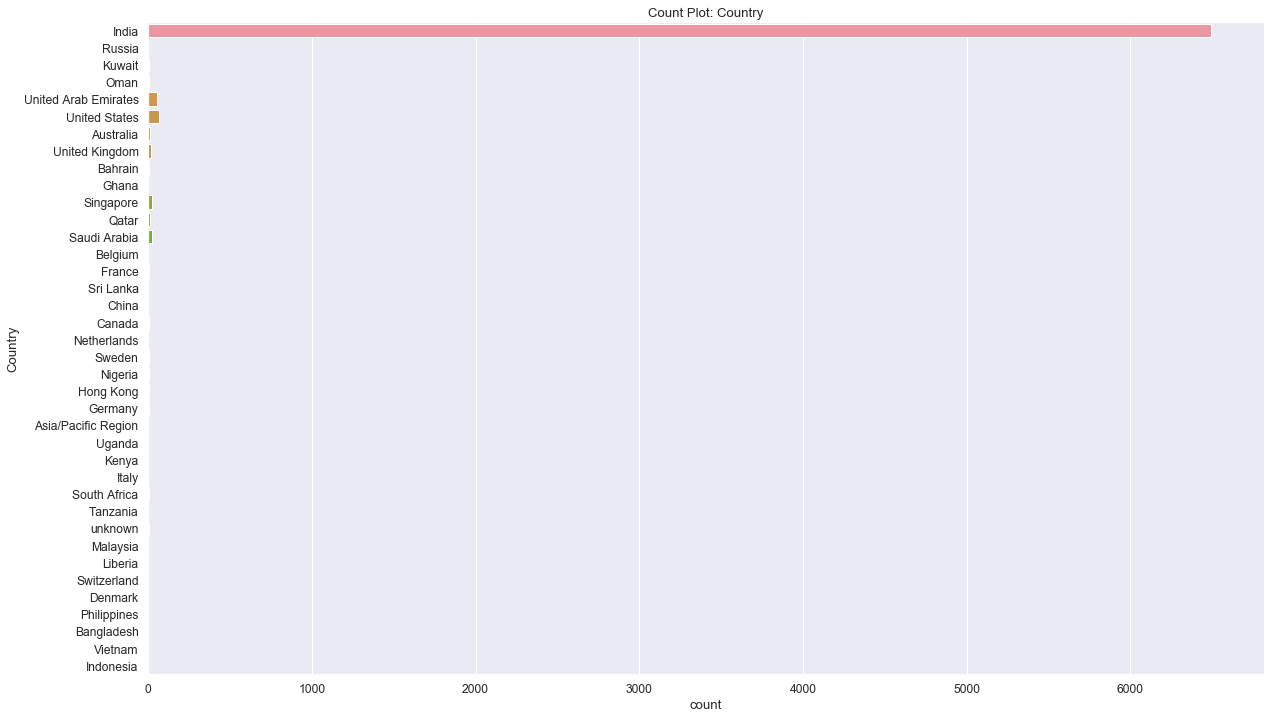

In [431]:
# Count Plot of Country

plt.figure(figsize = (20,12))
sns.countplot(y=lead_df['Country'])
plt.title('Count Plot: Country')
plt.show()

*Here as we see the ~99% Leads belongs to `India` hence replacing null values with the same.*

In [432]:
# filling NA countries to India

lead_df['Country'].fillna('India',inplace=True)

In [433]:
#checking value counts for Do Not Call
lead_df['Do Not Call'].value_counts(dropna=False)

#checking value counts for Do Not Email
lead_df['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

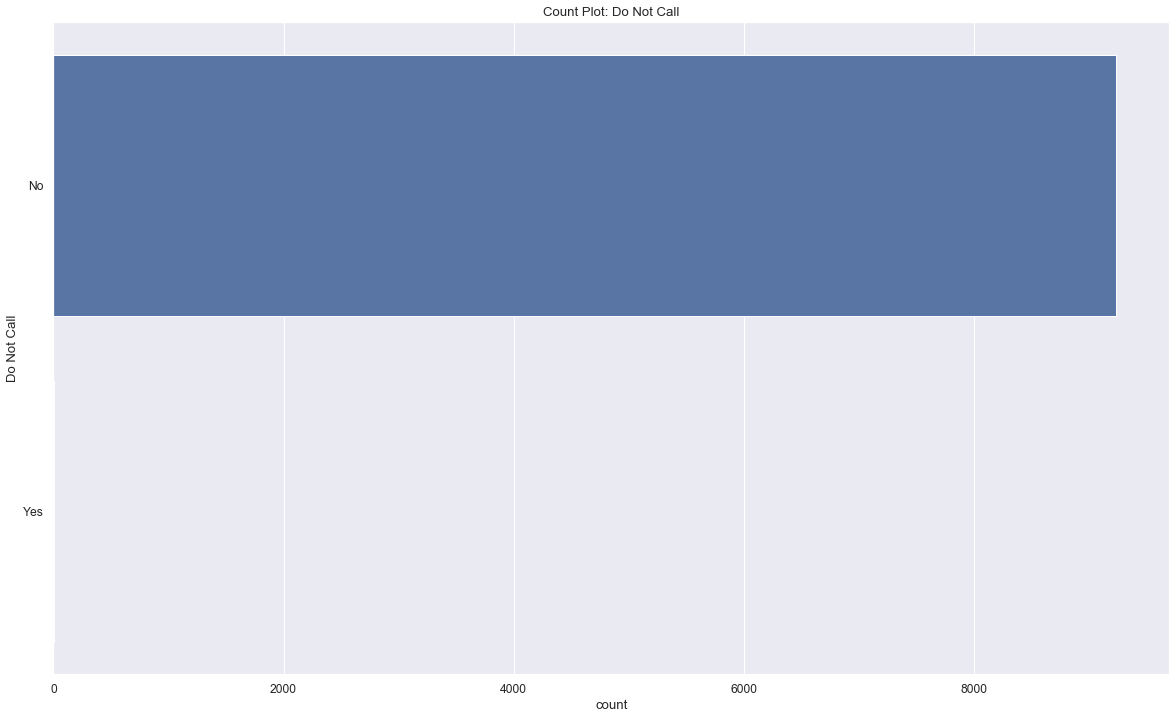

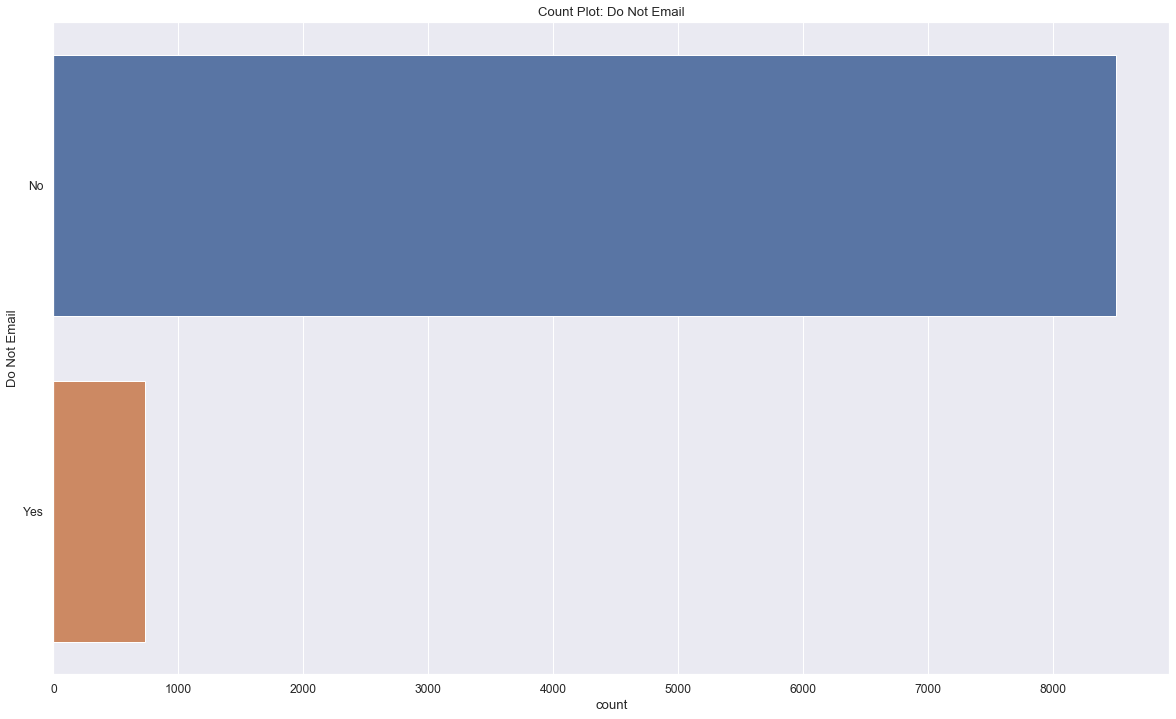

In [434]:
# Count Plot of Do Not Call/Do Not Mail

plt.figure(figsize = (20,12))
sns.countplot(y=lead_df['Do Not Call'])
plt.title('Count Plot: Do Not Call')
plt.show()

plt.figure(figsize = (20,12))
sns.countplot(y=lead_df['Do Not Email'])
plt.title('Count Plot: Do Not Email')
plt.show()

In [435]:
#clubbing lower frequency values

lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

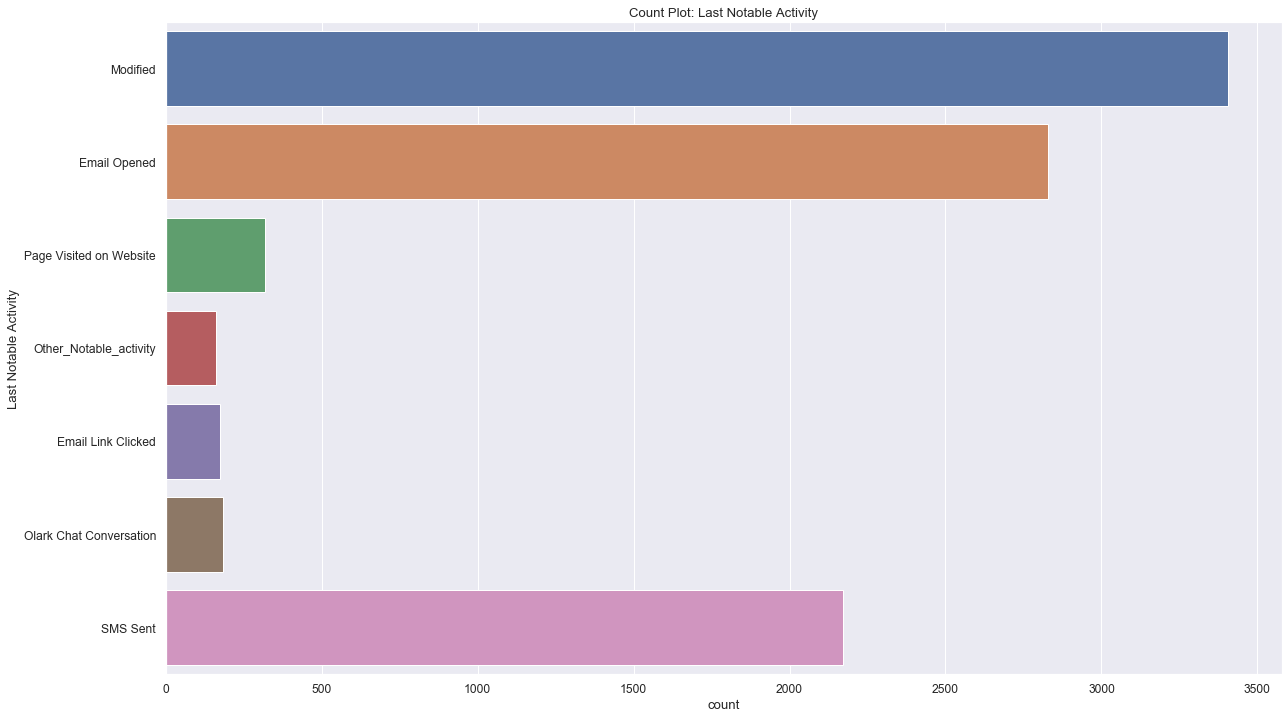

In [436]:
# Count Plot of Last Notable Activity

plt.figure(figsize = (20,12))
sns.countplot(y=lead_df['Last Notable Activity'])
plt.title('Count Plot: Last Notable Activity')
plt.show()


In [437]:
# We can remove below columns as they are having very low null values percentage
# TotalVisits,
# Page Views Per Visit,
# Last Activity,
# Lead Source.

lead_df = lead_df.dropna()

In [438]:
# Review for clean dataset

round((lead_df.isnull().sum()/len(lead_df.index))*100,2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

#### Inference
- Maximum number of leads are generated by Google and Direct traffic.
- Conversion Rate of reference leads and leads through welingak website is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [439]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [440]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [441]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque', 'Lead Number','Lead Quality'])

In [442]:
lead_corr = lead_df

In [443]:
#dropping columns
lead_corr = lead_corr.drop(cols_to_drop, axis = 1)
lead_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 16 columns):
Prospect ID                               9103 non-null object
Lead Origin                               9103 non-null object
Lead Source                               9103 non-null object
Do Not Email                              9103 non-null object
Do Not Call                               9103 non-null object
Converted                                 9103 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9103 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9103 non-null object
Specialization                            9103 non-null object
What is your current occupation           9103 non-null object
Tags                                      9103 non-null object
City                                      9103 non-null object
A free copy

In [444]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Lead Number',
 'Lead Quality']

#### 1.3.2 Numerical Attributes

In [445]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(lead_corr['Converted'])/len(lead_corr['Converted'].index))*100
Converted

38.02043282434362

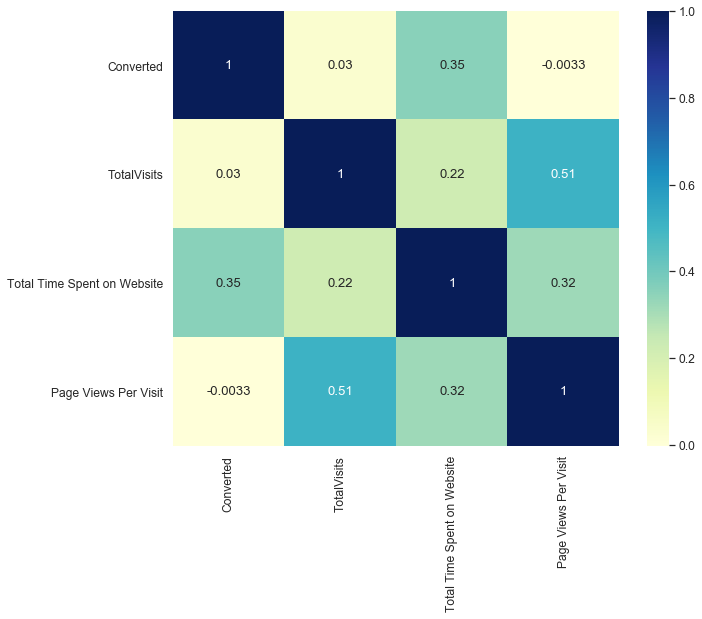

In [446]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(lead_corr.corr(), cmap="YlGnBu", annot=True)
plt.show()

****There is a high visible correlation between****
- No. of Visits
- Page Views Per Visit
- Total Time spent on Werbite
- Converted

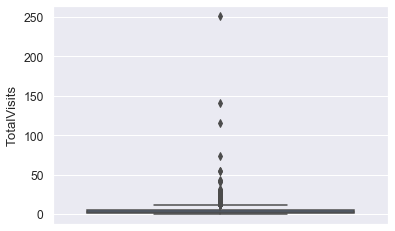

In [447]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead_df['TotalVisits'])
plt.show()

There are outliers present in our data

In [448]:
#checking percentile values for "Total Visits"

lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

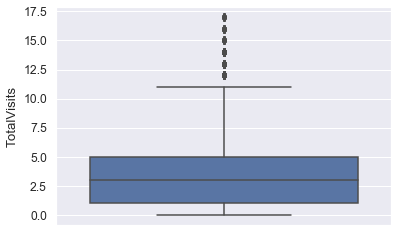

In [449]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = lead_df.TotalVisits.quantile(0.99)
lead_df = lead_df[(lead_df.TotalVisits <= Q3)]
Q1 = lead_df.TotalVisits.quantile(0.01)
lead_df = lead_df[(lead_df.TotalVisits >= Q1)]
sns.boxplot(y=lead_df['TotalVisits'])
plt.show()

In [450]:
lead_df.shape

(9020, 31)

In [451]:
#checking percentiles for "Total Time Spent on Website"

lead_df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

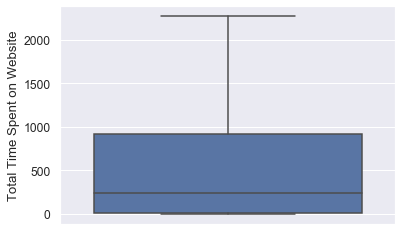

In [452]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead_df['Total Time Spent on Website'])
plt.show()

Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

In [453]:
#checking spread of "Page Views Per Visit"

lead_df['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

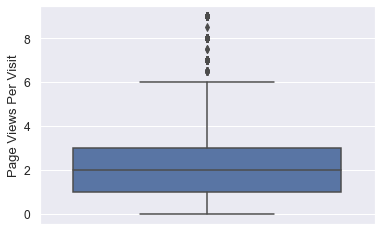

In [461]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead_df['Page Views Per Visit'])
plt.show()

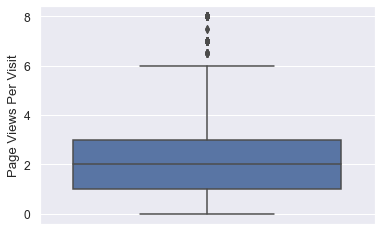

In [462]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[lead_df['Page Views Per Visit'] <= Q3]
Q1 = lead_df['Page Views Per Visit'].quantile(0.01)
lead_df = lead_df[lead_df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead_df['Page Views Per Visit'])
plt.show()

In [456]:
lead_df.shape

(8953, 31)

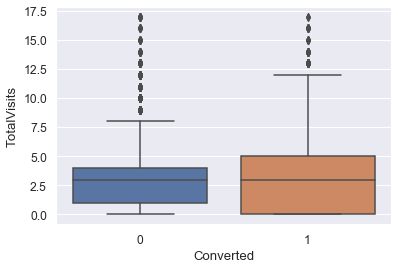

In [463]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.show()

Inference
- Median for converted and unconverted leads is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

In [458]:
#checking missing values in leftover columns/

round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

***Finally, Our data has been cleaned. We removed columns having null values more than 70% and for rest we replaced the null values with the suitable value as per buisness point of view.***

In [459]:
# Dropping some variables as they are not helping in analysis as per EDA

# lead_df = lead_df.drop(['Prospect ID',
#                         'Lead Number',
#                         'What matters most to you in choosing a course',
#                         'Search','Magazine',
#                         'Newspaper Article',
#                         'X Education Forums',
#                         'Newspaper',
#                         'Digital Advertisement',
#                         'Through Recommendations',
#                         'Receive More Updates About Our Courses',
#                         'Update me on Supply Chain Content',
#                         'Get updates on DM Content',
#                         'I agree to pay the amount through cheque',
#                         'A free copy of Mastering The Interview',
#                         'Country','Lead Quality','Tags','Do Not Call','Do Not Email'],1)


lead_df = lead_df.drop(['Prospect ID','What matters most to you in choosing a course','Country','Lead Quality','Tags'], axis=1)

## 2. **Dummy Values** - Converting Categorical Features into their Dummies

In [460]:
# Casually observing featuers and type of data they have.

lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,Other Cities,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,Other Cities,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [381]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy = pd.get_dummies(lead_df[['Lead Origin', 
                                'Lead Source', 
                                'Last Activity', 
                                'Specialization',
                                'What is your current occupation',
                                'City',
                                'Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Others,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [382]:
# Adding the results to the master dataframe

lead_df = pd.concat([lead_df, dummy], axis=1)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Others,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Other Cities,No,No,Modified,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Other Cities,No,No,Email Opened,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,N

In [383]:
# Removing orignal columns which are converted to thier dummies

lead_df = lead_df.drop(['Lead Origin', 
                        'Lead Source', 
                        'Last Activity', 
                        'Specialization',
                        'What is your current occupation',
                        'City',
                        'Last Notable Activity'], axis=1)

In [384]:
# Casually observing data to check if categorical columns are converted into thier dummies or not.

lead_df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Others,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,No,No,0,0.0,0,0.0,India,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,No,No,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,No,No,0,5.0,674,2.5,India,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,No,No,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,No,No,1,2.0,1532,2.0,India,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,No,Yes,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,No,No,0,1.0,305,1.0,India,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,No,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,No,No,1,2.0,1428,1.0,India,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,No,No,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [385]:
# Checking shape of dataframe after converting into Dummies

lead_df.shape

(8953, 76)

## 3. **Data Spliting** - Train Test Split

In [386]:
# Importing train_test_split from SKLearn

from sklearn.model_selection import train_test_split

In [387]:
# Separating Dependent variable and Independent variables.

X = lead_df.drop('Converted', axis=1)
y = lead_df['Converted']

In [388]:
# Casually seeing independent variables X

X.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Others,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,No,No,0.0,0,0.0,India,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,No,No,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,No,No,5.0,674,2.5,India,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,No,No,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,No,No,2.0,1532,2.0,India,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,No,Yes,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,No,No,1.0,305,1.0,India,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,No,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,No,No,2.0,1428,1.0,India,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,No,No,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [389]:
# Casually seeing dependent variables y


y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [390]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 4. **Feature Scaling** - MinMaxScaler

In [391]:
# Importing MinMaxScaler from SKLearn

from sklearn.preprocessing import MinMaxScaler

In [392]:
# Scaling the data

scaler = MinMaxScaler()

cols_to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Fitting and Transfroming with MinMaxScaler
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

X_train.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Others,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,61f5ddfd-f8aa-41d6-9d9e-b1766cfaf10f,579918,No,No,0.294118,0.655810,0.555556,India,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,No,No,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4696,e8c2aee4-27bc-4a89-b8ab-bff7eb13ce7a,614744,No,No,0.176471,0.201144,0.333333,India,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,No,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3274,07fdedf0-0d12-42d1-9b0e-8cbebeca136c,628615,No,No,0.235294,0.055458,0.222222,India,Better Career Prospects,No,No,No,No,No,No,No,No,No Tags,Not Sure,No,No,No,No,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2164,65c8f628-c1d6-4c6d-9646-aee5904398d8,639044,No,No,0.117647,0.172975,0.222222,India,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Not Sure,No,No,No,No,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1667,983aeea0-7665-4044-995e-e62053fcf3b1,643101,No,No,0.235294,0.513644,0.147778,India,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,No,No,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0


## 5. **Feature Selection** - using RFE

In [393]:
# Filtering most important features using RFE

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()

#Initializing RFE model
rfe = RFE(model, 25)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model

model.fit(X_rfe,y_train)
# print(X_train.columns)
# print(rfe.support_)
# print(rfe.ranking_)

rfe_features = pd.DataFrame()
rfe_features['X_train'] = X_train.columns
rfe_features['support_'] = rfe.support_
rfe_features['ranking_'] = rfe.ranking_
rfe_features = rfe_features.sort_values(by='ranking_').set_index(np.arange(len(X_train.columns)))
rfe_features['ranking_']= rfe_features['ranking_'].astype(int)
rfe_features[rfe_features['ranking_']<=2]


ValueError: could not convert string to float: '61f5ddfd-f8aa-41d6-9d9e-b1766cfaf10f'

In [282]:
# Filtering features which has rank 1 given by RFE

rfe_features[rfe_features['ranking_'] == 1]['X_train'].values

array(['TotalVisits', 'Last Notable Activity_Other_Notable_activity',
       'City_Other Cities',
       'What is your current occupation_Working Professional',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Student',
       'Specialization_Services Excellence',
       'Specialization_Retail Management', 'Specialization_Others',
       'Specialization_Hospitality Management',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Unsubscribed', 'Last Activity_SMS Sent',
       'Last Activity_Resubscribed to emails',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Total Time Spent on Website',
       'Last Activity_Email Opened', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Others',
       'Last Activity_Email Bounced', 'Lead Source_Olark Chat',
       'Lead Origin_Landing Page Submission'], dtype=object)

## 6. **Model Building** - Logistic Regression

In [252]:
# importing libraries

import statsmodels.api as sm

### **Logistic Regression Model - 1** (lr1)
*- Building our first logistic regression model with all `final_features` list of features given by `RFE`.*

In [283]:
# Logistic regression model - 1

final_features = ['TotalVisits', 'Last Notable Activity_Other_Notable_activity',
       'City_Other Cities',
       'What is your current occupation_Working Professional',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Student',
       'Specialization_Services Excellence',
       'Specialization_Retail Management', 'Specialization_Others',
       'Specialization_Hospitality Management',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Unsubscribed', 'Last Activity_SMS Sent',
       'Last Activity_Resubscribed to emails',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Total Time Spent on Website',
       'Last Activity_Email Opened', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Others',
       'Last Activity_Email Bounced', 'Lead Source_Olark Chat',
       'Lead Origin_Landing Page Submission']

# building first fitted model
X_train_lr1 = sm.add_constant(X_train[final_features])
lr1 = sm.GLM(y_train,X_train_lr1, family = sm.families.Binomial()).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6241
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.0
Date:                Mon, 07 Sep 2020   Deviance:                       5108.0
Time:                        20:26:51   Pearson chi2:                 6.59e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9863      0.607     -1.624      0.104      -2.176       0.204
TotalVisits                                              1.4911      0.295      5.053      0.000       0.913       2.069
Last Notable Activity_Other_Notable_activity             2.2658      0.380      5.969      0.000       1.522       3.010
City_Other Cities                                       -0.6222      0.174     -3.571      0.000      -0.964      -0.281
What is your current occupation_Working Professional     1.8992      0.618      3.075      0.002       0.689       3.110
What is your current occupation_Unemployed              -0.8053      0.586     -1.373      0.170      -1.955       0.344
What is your current occupation_Student                 -0.5164      0.634     -0.814      0.416      -1.760       0.727
Specialization_Services Excellence                      -0.7296      0.646     -1.129      0.259      -1.996       0.537
Specialization_Retail Management                        -0.5218      0.345     -1.513      0.130      -1.198       0.154
Specialization_Others                                   -0.7249      0.165     -4.381      0.000      -1.049      -0.401
Specialization_Hospitality Management                   -0.5484      0.342     -1.603      0.109      -1.219       0.122
Last Activity_View in browser link Clicked             -20.3842   2.06e+04     -0.001      0.999   -4.04e+04    4.03e+04
Last Activity_Unsubscribed                              -1.9791      0.580     -3.414      0.001      -3.115      -0.843
Last Activity_SMS Sent                                   0.9183      0.165      5.567      0.000       0.595       1.242
Last Activity_Resubscribed to emails                    21.4121   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Last Activity_Olark Chat Conversation                   -0.9405      0.195     -4.825      0.000      -1.323      -0.558
Last Activity_Had a Phone Conversation                   2.8434      0.884      3.216      0.001       1.111       4.576
Last Notable Activity_SMS Sent                           1.3459      0.149      9.051      0.000       1.054       1.637
Total Time Spent on Website                              4.3957      0.168     26.223      0.000       4.067       4.724
Last Activity_Email Opened                               0.7822      0.111      7.078      0.000       0.566       0.999
Page Views Per Visit                                    -1.1711      0.268     -4.378      0.000      -1.695      -0.647
Lead Origin_Lead Add Form                                3.8449      0.262     14.684      0.000       3.332       4.358
Lead Source_Others                                       0

### **Calculating VIF of lr1**

In [284]:
# Check for the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [285]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
X_vif = X_train_lr1.drop('const',axis=1)
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index(np.arange(len(vif)))

,Features,VIF
0,What is your current occupation_Unemployed,23.58
1,City_Other Cities,8.92
2,Lead Origin_Landing Page Submission,8.65
3,Specialization_Others,7.48
4,Last Activity_SMS Sent,6.89
5,Page Views Per Visit,6.62
6,Last Notable Activity_SMS Sent,5.01
7,TotalVisits,4.91
8,Last Activity_Email Opened,3.39
9,Lead Source_Olark Chat,3.03


***Observation***
<br> *- As we see, our VIF looks good. All values are under 5 unit value..But..
<br> - ..But we have high p-values. We will keep features which are having p-value < 0.05 and will remove rest with higher p-values.*

### **Logistic Regression Model - 2** (lr2)
*- Removing `What is your current occupation_Housewife` column from `final_feature` as it has `p-value=0.999`*

In [286]:
# Logistic regression model -2 

# Removing "Tags_wrong number given" from model
final_features = ['TotalVisits', 'Last Notable Activity_Other_Notable_activity',
       'City_Other Cities',
       'What is your current occupation_Working Professional',
       'What is your current occupation_Student',
       'Specialization_Services Excellence',
       'Specialization_Retail Management', 'Specialization_Others',
       'Specialization_Hospitality Management',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Unsubscribed', 'Last Activity_SMS Sent',
       'Last Activity_Resubscribed to emails',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Total Time Spent on Website',
       'Last Activity_Email Opened', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Others',
       'Last Activity_Email Bounced', 'Lead Source_Olark Chat',
       'Lead Origin_Landing Page Submission']

X_train_lr2 = sm.add_constant(X_train[final_features])
lr2 = sm.GLM(y_train,X_train_lr2, family = sm.families.Binomial()).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6242
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.0
Date:                Mon, 07 Sep 2020   Deviance:                       5109.9
Time:                        20:27:59   Pearson chi2:                 6.60e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7798      0.186     -9.565      0.000      -2.145      -1.415
TotalVisits                                              1.4937      0.295      5.061      0.000       0.915       2.072
Last Notable Activity_Other_Notable_activity             2.2624      0.380      5.960      0.000       1.518       3.006
City_Other Cities                                       -0.6231      0.174     -3.576      0.000      -0.965      -0.282
What is your current occupation_Working Professional     2.7002      0.203     13.278      0.000       2.302       3.099
What is your current occupation_Student                  0.2852      0.249      1.147      0.252      -0.202       0.773
Specialization_Services Excellence                      -0.7336      0.646     -1.135      0.256      -2.000       0.533
Specialization_Retail Management                        -0.5255      0.345     -1.524      0.128      -1.202       0.150
Specialization_Others                                   -0.7351      0.165     -4.444      0.000      -1.059      -0.411
Specialization_Hospitality Management                   -0.5536      0.342     -1.618      0.106      -1.224       0.117
Last Activity_View in browser link Clicked             -20.3839   2.06e+04     -0.001      0.999   -4.04e+04    4.03e+04
Last Activity_Unsubscribed                              -1.9816      0.580     -3.418      0.001      -3.118      -0.845
Last Activity_SMS Sent                                   0.9129      0.165      5.535      0.000       0.590       1.236
Last Activity_Resubscribed to emails                    21.4135   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Last Activity_Olark Chat Conversation                   -0.9364      0.195     -4.808      0.000      -1.318      -0.555
Last Activity_Had a Phone Conversation                   2.8389      0.884      3.211      0.001       1.106       4.572
Last Notable Activity_SMS Sent                           1.3464      0.149      9.052      0.000       1.055       1.638
Total Time Spent on Website                              4.3984      0.168     26.241      0.000       4.070       4.727
Last Activity_Email Opened                               0.7807      0.110      7.067      0.000       0.564       0.997
Page Views Per Visit                                    -1.1662      0.267     -4.360      0.000      -1.690      -0.642
Lead Origin_Lead Add Form                                3.8499      0.262     14.708      0.000       3.337       4.363
Lead Source_Others                                       0.5163      0.222      2.330      0.020       0.082       0.951
Last Activity_Email Bounced                             -1

### **Calculating VIF of lr2**


In [287]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
X_vif = X_train_lr2.drop('const',axis=1)
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index(np.arange(len(vif)))

,Features,VIF
0,City_Other Cities,7.77
1,Specialization_Others,7.07
2,Last Activity_SMS Sent,6.60
3,Page Views Per Visit,6.34
4,Last Notable Activity_SMS Sent,5.01
5,TotalVisits,4.73
6,Lead Origin_Landing Page Submission,4.31
7,Last Activity_Email Opened,2.95
8,Lead Source_Olark Chat,2.48
9,Total Time Spent on Website,2.21


***Observation***
<br> *- Again, after removing one column with high p value we still see our VIF is fine.
<br> - Having `Last Activity_Had a Phone Conversation` as `p-value=1.05`. We will remove this column.*


### **Logistic Regression Model - 3** (lr3)
*- Removing `What is your current occupation_Housewife` column from `final_feature` as it has `p-value=1`*

In [288]:
# Logistic regression model -2 

# Removing "Tags_wrong number given" from model
final_features = ['TotalVisits', 'Last Notable Activity_Other_Notable_activity',
       'What is your current occupation_Working Professional',
       'What is your current occupation_Student',
       'Specialization_Services Excellence',
       'Specialization_Retail Management', 'Specialization_Others',
       'Specialization_Hospitality Management',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Unsubscribed', 'Last Activity_SMS Sent',
       'Last Activity_Resubscribed to emails',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Total Time Spent on Website',
       'Last Activity_Email Opened', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Others',
       'Last Activity_Email Bounced', 'Lead Source_Olark Chat',
       'Lead Origin_Landing Page Submission']

X_train_lr3 = sm.add_constant(X_train[final_features])
lr3 = sm.GLM(y_train,X_train_lr3, family = sm.families.Binomial()).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6243
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.3
Date:                Mon, 07 Sep 2020   Deviance:                       5122.6
Time:                        20:31:19   Pearson chi2:                 6.51e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9828      0.177    -11.213      0.000      -2.329      -1.636
TotalVisits                                              1.5346      0.294      5.221      0.000       0.958       2.111
Last Notable Activity_Other_Notable_activity             2.2467      0.378      5.939      0.000       1.505       2.988
What is your current occupation_Working Professional     2.6769      0.205     13.070      0.000       2.276       3.078
What is your current occupation_Student                  0.3119      0.247      1.264      0.206      -0.172       0.796
Specialization_Services Excellence                      -0.7060      0.642     -1.099      0.272      -1.965       0.553
Specialization_Retail Management                        -0.5378      0.343     -1.566      0.117      -1.211       0.135
Specialization_Others                                   -1.1243      0.127     -8.876      0.000      -1.373      -0.876
Specialization_Hospitality Management                   -0.5616      0.340     -1.652      0.098      -1.228       0.105
Last Activity_View in browser link Clicked             -20.3761   2.04e+04     -0.001      0.999      -4e+04    3.99e+04
Last Activity_Unsubscribed                              -1.9673      0.579     -3.395      0.001      -3.103      -0.832
Last Activity_SMS Sent                                   0.8925      0.165      5.415      0.000       0.569       1.216
Last Activity_Resubscribed to emails                    21.3988   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Last Activity_Olark Chat Conversation                   -0.9633      0.194     -4.956      0.000      -1.344      -0.582
Last Activity_Had a Phone Conversation                   2.7811      0.891      3.121      0.002       1.034       4.528
Last Notable Activity_SMS Sent                           1.3485      0.149      9.050      0.000       1.056       1.641
Total Time Spent on Website                              4.3902      0.167     26.245      0.000       4.062       4.718
Last Activity_Email Opened                               0.7877      0.110      7.152      0.000       0.572       1.004
Page Views Per Visit                                    -1.1697      0.267     -4.377      0.000      -1.694      -0.646
Lead Origin_Lead Add Form                                3.8697      0.262     14.797      0.000       3.357       4.382
Lead Source_Others                                       0.5328      0.222      2.401      0.016       0.098       0.968
Last Activity_Email Bounced                             -1.9196      0.402     -4.775      0.000      -2.708      -1.132
Lead Source_Olark Chat                                   1

### **Calculating VIF of lr3**


In [289]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
X_vif = X_train_lr3.drop('const',axis=1)
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index(np.arange(len(vif)))

,Features,VIF
0,Last Activity_SMS Sent,6.51
1,Page Views Per Visit,6.30
2,Last Notable Activity_SMS Sent,5.01
3,TotalVisits,4.73
4,Lead Origin_Landing Page Submission,4.01
5,Last Activity_Email Opened,2.92
6,Specialization_Others,2.85
7,Lead Source_Olark Chat,2.42
8,Total Time Spent on Website,2.20
9,Last Activity_Olark Chat Conversation,1.88


***Observation***
<br>*- As we see, there is one more columns with high p-value which is `Last Activity_Email Bounced` having `p-value=1.17`. Will remove this also.
<br>- `VIF` still looks good.*

### **Logistic Regression Model - 4** (lr4)
*- Removing `Last Activity_Email Bounced` column from `final_feature` as it has `p-value=1.17`*

In [303]:
# Logistic regression model -2 

# Removing "Tags_wrong number given" from model
final_features = ['TotalVisits', 'Last Notable Activity_Other_Notable_activity',
       'What is your current occupation_Working Professional',
        'Specialization_Others',
       'Last Activity_Unsubscribed',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Total Time Spent on Website',
       'Last Activity_Email Opened',
       'Lead Origin_Lead Add Form', 'Lead Source_Others',
       'Last Activity_Email Bounced', 'Lead Source_Olark Chat',
       'Lead Origin_Landing Page Submission']

X_train_lr4 = sm.add_constant(X_train[final_features])
lr4 = sm.GLM(y_train,X_train_lr4, family = sm.families.Binomial()).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.7
Date:                Mon, 07 Sep 2020   Deviance:                       5177.4
Time:                        20:37:26   Pearson chi2:                 6.56e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9272      0.162    -11.911      0.000      -2.244      -1.610
TotalVisits                                              0.8448      0.251      3.372      0.001       0.354       1.336
Last Notable Activity_Other_Notable_activity             2.0712      0.371      5.577      0.000       1.343       2.799
What is your current occupation_Working Professional     2.6305      0.202     13.013      0.000       2.234       3.027
Specialization_Others                                   -1.0443      0.125     -8.368      0.000      -1.289      -0.800
Last Activity_Unsubscribed                              -2.1252      0.579     -3.668      0.000      -3.261      -0.990
Last Activity_Olark Chat Conversation                   -1.2447      0.185     -6.723      0.000      -1.608      -0.882
Last Activity_Had a Phone Conversation                   2.4531      0.892      2.751      0.006       0.705       4.201
Last Notable Activity_SMS Sent                           1.9177      0.102     18.794      0.000       1.718       2.118
Total Time Spent on Website                              4.3898      0.166     26.397      0.000       4.064       4.716
Last Activity_Email Opened                               0.4935      0.093      5.300      0.000       0.311       0.676
Lead Origin_Lead Add Form                                4.1247      0.258     15.982      0.000       3.619       4.631
Lead Source_Others                                       0.5138      0.221      2.328      0.020       0.081       0.946
Last Activity_Email Bounced                             -2.1079      0.393     -5.361      0.000      -2.879      -1.337
Lead Source_Olark Chat                                   1.2070      0.132      9.111      0.000       0.947       1.467
Lead Origin_Landing Page Submission                     -1.0763      0.128     -8.402      0.000      -1.327      -0.825
========================================================================================================================
"""

### **Calculating VIF of lr4**


In [304]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
X_vif = X_train_lr4.drop('const',axis=1)
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index(np.arange(len(vif)))

,Features,VIF
0,Lead Origin_Landing Page Submission,3.26
1,TotalVisits,2.93
2,Specialization_Others,2.66
3,Last Activity_Email Opened,2.40
4,Lead Source_Olark Chat,2.26
5,Total Time Spent on Website,2.17
6,Last Notable Activity_SMS Sent,2.00
7,Last Activity_Olark Chat Conversation,1.74
8,Last Notable Activity_Other_Notable_activity,1.47
9,Lead Origin_Lead Add Form,1.43


***Observation***
<br>*- Finally, our `lr4` model is ready. It does not have any features insignificant features and having low `p-values` and `VIFs`.
<br>- We are left with `12 significant features` in final model `lr4`.*

## 7. **Model Evalution** - with Train Dataset 

<br>***Predicting with Train Dataset*** - *Now, we will see our model `lr2` is behaving correct or not. We will pass some `X_train` values and compare the output i.e `y_train_pred` with `y_train`.*

In [306]:
# predicting with train dataset

y_train_pred = lr4.predict(X_train_lr4)
y_train_pred.head()

9196    0.885081
4696    0.486548
3274    0.344420
2164    0.033651
1667    0.734951
dtype: float64

***As given, CEO decided the cutoff point to distinguish the `Cold Leads` & `Hot Leads` as `80%`. So, will pass the same to our model as cutoff value 0.8.***

In [307]:
# Cutoff = 0.8

y_train_pred_label = y_train_pred.apply(lambda x: 1 if x > 0.8 else 0)

In [308]:
# Final train pred result

final_train_pred_result = pd.DataFrame({'Converted':y_train, 'Converted_prob': y_train_pred, 'Converted_pred':y_train_pred_label})
final_train_pred_result.head()

,Converted,Converted_prob,Converted_pred
9196,1,0.885081,1
4696,0,0.486548,0
3274,0,0.344420,0
2164,0,0.033651,0
1667,1,0.734951,0


***Observation***
<br>*- Our final logistic regression model `lr2` is behaving correct with train dataset.*

***Now, lets test model using some important metrics***

In [268]:
# importing metrics

from sklearn import metrics

***Confusion Matrix***

In [309]:
# Confusion matrix 

confusion = metrics.confusion_matrix(final_train_pred_result.Converted, final_train_pred_result.Converted_pred )
print(confusion)

[[3766  116]
 [1374 1011]]


In [ ]:
# Predicted     not_converted    converted
# Actual
# not_converted        3855      50
# converted            531       1915  

***Accuracy Score***

In [310]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(final_train_pred_result.Converted, final_train_pred_result.Converted_pred))

0.762246689005904


***True Positives, True Negatives, False Positives, False Negatives***

In [311]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

***Sensitivity***

In [312]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.4238993710691824

***Specificity***

In [273]:
# Let us calculate specificity

TN / float(TN+FP)

0.9721792890262752

***False Postive Rate***

In [274]:
# Calculate false postive rate

print(FP/ float(TN+FP))

0.027820710973724884


***Positive Predictive Value***

In [275]:
# positive predictive value 

print (TP / float(TP+FP))

0.8991596638655462


***Negative Predictive Value***

In [276]:
# Negative predictive value

print (TN / float(TN+ FN))

0.7263279445727483


***ROC and AUC Curve***

In [277]:
# draw_roc

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [314]:
fpr, tpr, thresholds = metrics.roc_curve( final_train_pred_result.Converted, final_train_pred_result.Converted_prob, drop_intermediate = False )

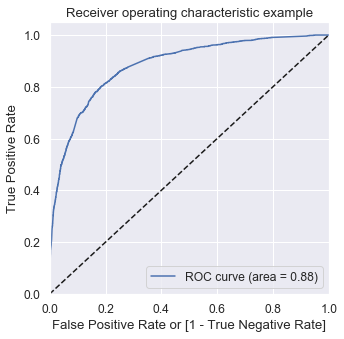

In [315]:
draw_roc(final_train_pred_result.Converted, final_train_pred_result.Converted_prob)

### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:
- Accuracy : 
- Sensitivity : 
- Specificity : 

## 8. **Model Evalution** - with Test Dataset 

In [ ]:
# Rescale Transforming of test dataset

cols_to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Transforming columns
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [ ]:
# Predicting on test dataset

X_test_lr = sm.add_constant(X_test[final_features])
y_test_pred = lr2.predict(X_test_lr)


In [ ]:
# defining labels as cutoff values = 0.8

y_test_pred_label = y_test_pred.apply( lambda x : 1 if x>0.8 else 0)

In [ ]:
# Final test result

final_test_result = pd.DataFrame({'Coverted': y_test, 'Converted_Prob':y_test_pred, 'Converted_Pred':y_test_pred_label})
final_test_result.head()

***Accuracy Score***

In [ ]:
# Let's check the overall accuracy.

metrics.accuracy_score(final_test_result.Coverted, final_test_result.Converted_Pred)

***Confusion Metrix***

In [ ]:
# Confusing metrics of test predicted dataset

confusion2 = metrics.confusion_matrix(final_test_result.Coverted, final_test_result.Converted_Pred)
confusion2

***True Positives, True Negatives, False Positives, False Negatives***

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# importing precision and recall libs from sklearn

from sklearn.metrics import precision_score, recall_score

***Precision Score***

In [ ]:
precision_score(final_test_result.Coverted, final_test_result.Converted_Pred)

***Recall Score***

In [ ]:
recall_score(final_test_result.Coverted, final_test_result.Converted_Pred)

***Sensitivity***

In [ ]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

***Specificity***

In [ ]:
# Let us calculate specificity

TN / float(TN+FP)

***ROC and AUC Curve***

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(final_test_result.Coverted, final_test_result.Converted_Prob, drop_intermediate = False )

In [ ]:
draw_roc(final_test_result.Coverted, final_test_result.Converted_Prob)

## Final Observation:

Let us compare the values obtained for Train & Test:

### <u> Train Data: </u>
- Accuracy :
- Sensitivity : 
- Specificity : 

### <u> Test Data: </u>
- Accuracy : 
- Sensitivity : 
- Specificity : 

**The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model**